In [1]:
import pandas as pd
from megadetector.detection.run_detector_batch import load_and_run_detector_batch

In [2]:
batch_size = 24
images_paths = pd.read_csv('y_clean_thin.csv', index_col=0)['image_path']
images_paths

0        ../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-4...
1        ../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-3...
2        ../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-5...
3        ../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-4...
4        ../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-2...
                               ...                        
18102    ../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-22 ...
18103    ../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-23 ...
18104    ../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 ...
18105    ../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 ...
18106    ../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-03 ...
Name: image_path, Length: 18107, dtype: object

In [3]:
results = load_and_run_detector_batch(
       "MDV5A", images_paths, confidence_threshold=0.1, batch_size=batch_size, n_cores=12)

Model v5a.0.1 already exists and is valid at /tmp/megadetector_models/md_v5a.0.1.pt
PyTorch reports 1 available CUDA devices
GPU available: True
PyTorch reports 1 available CUDA devices
GPU available: True


/media/plk/TOSHIBA EXT/mgr/.venv/lib/python3.12/site-packages/yolov5/utils/general.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg


Loading PT detector with compatibility mode classic
Loaded image size 1280 from model metadata
Using model stride: 64
PTDetector using device cuda:0


Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


Loaded model in 2.6 seconds


 85%|████████▍ | 638/755 [1:11:25<12:49,  6.58s/it]

Image ../pictures/25_PAPROCICE/R/Zima/2/2023-01-23 05-56-29.JPG cannot be loaded: [Errno 2] No such file or directory: '../pictures/25_PAPROCICE/R/Zima/2/2023-01-23 05-56-29.JPG'
Image ../pictures/25_PAPROCICE/R/Zima/2/2023-01-26 15-32-09.JPG cannot be loaded: [Errno 2] No such file or directory: '../pictures/25_PAPROCICE/R/Zima/2/2023-01-26 15-32-09.JPG'
Image ../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-17-44.JPG cannot be loaded: [Errno 2] No such file or directory: '../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-17-44.JPG'
Image ../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-18-25.JPG cannot be loaded: [Errno 2] No such file or directory: '../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-18-25.JPG'
Image ../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-20-11.JPG cannot be loaded: [Errno 2] No such file or directory: '../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-20-11.JPG'
Image ../pictures/25_PAPROCICE/R/Zima/2/2023-01-28 01-20-42.JPG cannot be loaded: [Errno 2] No such file 

100%|██████████| 755/755 [1:24:13<00:00,  6.69s/it]


In [4]:
images_paths_sec, categories, confs, bboxes, n_animals = [], [], [], [], []

for result in results:
    images_paths_sec.append(result.get('file'))
    
    detections = result.get('detections')
    if detections:
        detection = max(detections, key=lambda d: d["conf"])
        categories.append(detection.get('category'))
        confs.append(detection.get('conf'))
        bboxes.append(detection.get('bbox'))
        n_animals.append(len(detections))
    else:
        categories.append(None)
        confs.append(None)
        bboxes.append(None)
        n_animals.append(0)

results_df = pd.DataFrame({'image_path': images_paths_sec, 'category': categories, 'conf': confs, 'bbox': bboxes, 'n_animals': n_animals})

In [5]:
results_df.to_csv(f'megadetector_results_2.csv')

In [7]:
import json
with open('megadetector_raw.json', 'w') as fout:
    json.dump(results, fout)

### Single

In [3]:
images_paths = pd.read_csv('y_clean_thin.csv', index_col=0)['image_path']
images_paths[0]

'../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG'

In [4]:
image_path = '../pictures/11_ZUBEŃSKO/B/Wczesna jesień/2/2022-10-04 12-28-40.JPG'

In [5]:
results = load_and_run_detector_batch(
       "MDV5A", [image_path], confidence_threshold=0.1, batch_size=20, n_cores=6)

Model v5a.0.1 already exists and is valid at /tmp/megadetector_models/md_v5a.0.1.pt
PyTorch reports 1 available CUDA devices
GPU available: True
PyTorch reports 1 available CUDA devices
GPU available: True


/media/plk/TOSHIBA EXT/mgr/.venv/lib/python3.12/site-packages/yolov5/utils/general.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg


Loading PT detector with compatibility mode classic
Loaded image size 1280 from model metadata
Using model stride: 64
PTDetector using device cuda:0


Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


Loaded model in 2.84 seconds


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


In [6]:
results[0]

{'file': '../pictures/11_ZUBEŃSKO/B/Wczesna jesień/2/2022-10-04 12-28-40.JPG',
 'detections': [{'category': '1',
   'conf': 0.208,
   'bbox': [0.9494, 0.0008, 0.0505, 0.1732]},
  {'category': '1', 'conf': 0.853, 'bbox': [0.8241, 0.0, 0.1757, 0.1756]},
  {'category': '1', 'conf': 0.976, 'bbox': [0.2604, 0.0, 0.3874, 0.4899]}],
 'max_detection_conf': 0.976}

In [10]:
def crop_normalized_bbox(img: Image.Image, bbox: list[float]) -> Image.Image:
    """
    img: PIL.Image opened image
    bbox: list [x, y, w, h], normalized 0-1
    returns cropped PIL.Image
    """
    W, H = img.size
    x, y, w, h = bbox

    left = int(x * W)
    top = int(y * H)
    right = int((x + w) * W)
    bottom = int((y + h) * H)

    return img.crop((left, top, right, bottom))


def crop_normalized_bbox_square(img: Image.Image, bbox: list[float]) -> Image.Image:
    """
    img: PIL.Image opened image
    bbox: list [x, y, w, h], normalized 0-1
    returns cropped PIL.Image as square
    """
    W, H = img.size
    x, y, w, h = bbox

    # Convert normalized bbox to pixel coords
    left = int(x * W)
    top = int(y * H)
    right = int((x + w) * W)
    bottom = int((y + h) * H)

    # Original width/height in pixels
    bw = right - left
    bh = bottom - top

    # Determine square side
    side = max(bw, bh)

    # Compute center of bbox
    cx = left + bw // 2
    cy = top + bh // 2

    # Recompute square boundaries
    half = side // 2
    new_left = cx - half
    new_top = cy - half
    new_right = new_left + side
    new_bottom = new_top + side

    # Clamp to image boundaries
    new_left = max(0, new_left)
    new_top = max(0, new_top)
    new_right = min(W, new_right)
    new_bottom = min(H, new_bottom)

    return img.crop((new_left, new_top, new_right, new_bottom))


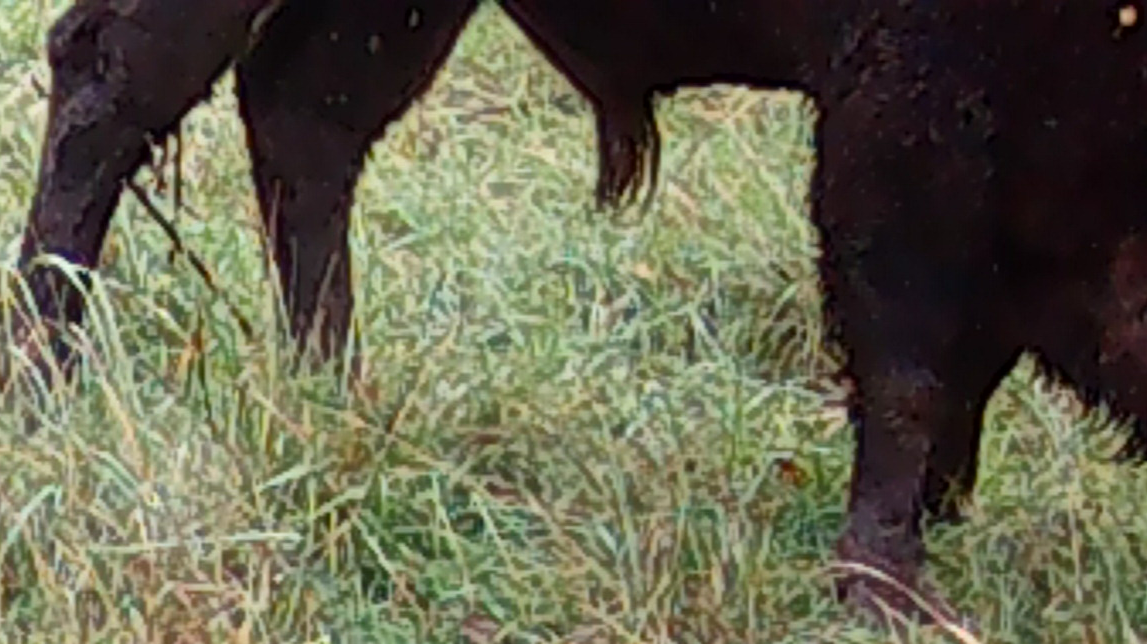

In [12]:
from PIL import Image
image = Image.open(image_path).convert("RGB")
crop_normalized_bbox(image, [0.8241, 0.0, 0.1757, 0.1756])